In [1]:
%matplotlib inline

import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display
import utils

import warnings 
warnings.filterwarnings('always')   #suppresses all warnings
warnings.filterwarnings('ignore')

In [2]:
tracks= utils.load("/Users/david/Desktop/DM2 project/fma_metadata/tracks.csv")
tracks_cut=['album','artist']
tracks.drop(tracks_cut,axis=1,inplace=True)
tracks=tracks.droplevel(0,axis=1)
tracks.drop(index=tracks[tracks.subset=='large'].index, inplace=True)
tracks_cut=['composer', 'date_created','date_recorded',
            'license','number','title','language_code',
            'publisher', 'tags','information','lyricist','genres','genres_all',
            'favorites','interest','bit_rate','split','subset']
tracks.drop(tracks_cut,axis=1,inplace=True)
tracks.drop(tracks[tracks['genre_top']=='Spoken'].index, inplace=True)

In [3]:
features= utils.load("/Users/david/Desktop/DM2 project/fma_metadata/features.csv")
feat=features[['spectral_centroid']]
feat=feat.droplevel(0,axis=1)
feat.columns=['kurtosis','max','mean','median','min','skew','std']
#cut=['roll_kurtosis','roll_max','roll_std','roll_median','roll_min','roll_skew']
#feat.drop(cut,axis=1,inplace=True)

In [4]:
#estrazioni da librosa_mp3 di 10  secondi dopo i primi 10 features rolloff
ts=pd.read_csv("/Users/david/Desktop/DM2 project/fma_metadata/ts_centroid.csv")
cut_columns=['Unnamed: 0','Unnamed: 0.1']
ts.drop(cut_columns, axis=1, inplace=True)
ts.shape

(1028, 1207)

In [5]:
ts=ts.set_index(['track_id'])

In [6]:
ts_df=pd.merge(tracks,ts, on='track_id')
ts_df.shape

(1028, 1210)

In [7]:
cut=ts_df.iloc[:,5:]
cut

1         2         3         4         5         6  \
track_id                                                               
4850      0.177222  0.170356  0.174893  0.181088  0.179945  0.180785   
4851      0.162770  0.188715  0.196280  0.222101  0.236519  0.235485   
5009      0.141881  0.181742  0.295769  0.343891  0.415385  0.524990   
5012      0.103542  0.167626  0.233723  0.334451  0.458624  0.421045   
5013      0.198303  0.286986  0.377489  0.289663  0.278561  0.435295   
...            ...       ...       ...       ...       ...       ...   
145571    0.142267  0.201845  0.222700  0.233242  0.242973  0.254982   
148488    0.432888  0.514998  0.490458  0.413571  0.402621  0.491540   
148490    0.315912  0.430291  0.527045  0.610343  0.618256  0.632774   
149735    0.237183  0.212326  0.156835  0.160548  0.165636  0.171989   
152844    0.438414  0.487034  0.571057  0.667958  0.698864  0.621619   

                 7         8         9        10  ...      1196      1197  \
track_id                                          ...                       
4850      0.181348  0.175140  0.177304  0.172171  ...  0.429477  0.438678   
4851      0.234684  0.237329  0.223463  0.202970  ...  0.100511  0.092096   
5009      0.526107  0.438027  0.430539  0.389028  ...  0.396982  0.354043   
5012      0.172120  0.230144  0.366459  0.454434  ...  0.291008  0.467978   
5013      0.430005  0.354197  0.245915  0.230021  ...  0.469473  0.409380   
...            ...       ...       ...       ...  ...       ...       ...   
145571    0.262475  0.263909  0.196623  0.134043  ...  0.684569  0.636211   
148488    0.525808  0.532001  0.530079  0.513555  ...  0.533067  0.665458   
148490    0.603301  0.517525  0.518159  0.528681  ...  0.759514  0.767398   
149735    0.213143  0.252836  0.292861  0.320697  ...  0.163778  0.084274   
152844    0.614751  0.600630  0.624657  0.701058  ...  0.637446  0.649099   

              1198      1199      1200      1201      1202      1203  \
track_id                                                               
4850      0.423448  0.416010  0.414990  0.434620  0.557168  0.779985   
4851      0.077473  0.062344  0.058620  0.039428  0.035532  0.036547   
5009      0.370011  0.368628  0.309365  0.282796  0.272292  0.276301   
5012      0.473676  0.195546  0.092509  0.263610  0.330493  0.367824   
5013      0.320596  0.243092  0.350757  0.478701  0.517602  0.362054   
...            ...       ...       ...       ...       ...       ...   
145571    0.606933  0.574697  0.627221  0.655860  0.663117  0.688209   
148488    0.739708  0.792238  0.852144  0.858632  0.790833  0.733323   
148490    0.699457  0.517079  0.291194  0.326616  0.426413  0.417115   
149735    0.112486  0.050523  0.021821  0.120618  0.125440  0.141565   
152844    0.621641  0.585209  0.687812  0.650924  0.525279  0.425969   

              1204      1205  
track_id                      
4850      0.852099  0.806474  
4851      0.003289  0.039476  
5009      0.301752  0.270572  
5012      0.399824  0.282295  
5013      0.187761  0.319275  
...            ...       ...  
145571    0.765299  0.918020  
148488    0.712553  0.685199  
148490    0.455782  0.601036  
149735    0.123273  0.093007  
152844    0.410384  0.372014  

[1028 rows x 1205 columns]

In [8]:
ts_df.drop(cut,axis=1, inplace=True)

In [9]:
ts_df=pd.merge(ts_df,feat, on='track_id')
ts_df

comments  duration            genre_top  listens         0  \
track_id                                                               
4850             0       164            Classical    13221  0.203188   
4851             0       236            Classical     9283  0.139737   
5009             0       257  Old-Time / Historic     1900  0.097878   
5012             0       245  Old-Time / Historic     3032  0.088058   
5013             0       269  Old-Time / Historic     3946  0.134297   
...            ...       ...                  ...      ...       ...   
145571           0       127            Classical     3242  0.104488   
148488           0       312            Classical      763  0.372093   
148490           0       353            Classical      480  0.236911   
149735           0       540            Classical     2744  0.256851   
152844           0        65            Classical     3287  0.462726   

           kurtosis          max         mean       median         min  \
track_id                                                                 
4850      40.157177  5693.858887   531.164001   445.917084  249.851807   
4851      45.221325  5715.818359   462.206146   386.870026    0.000000   
5009      29.038763  5579.080566   997.398926   933.559448    0.000000   
5012      17.429407  5512.500000  1491.275391  1410.062988    0.000000   
5013      71.632355  5511.795410   999.326538   958.825928    0.000000   
...             ...          ...          ...          ...         ...   
145571    21.598671  7337.872070   573.504334   294.138428  192.901352   
148488     0.242710  5512.074219   888.161499   819.300232    0.000000   
148490    25.423370  5198.076172  1073.537231  1063.086548  289.355316   
149735    -0.327003  5793.284180  1484.919800  1100.062134  185.252655   
152844    16.860886  5933.897461  1020.643921   810.757935    0.000000   

              skew          std  
track_id                         
4850      5.489871   376.292480  
4851      5.831337   378.367340  
5009      4.048092   321.319214  
5012      3.420450   337.361053  
5013      6.991871   252.320953  
...            ...          ...  
145571    4.666363  1112.711792  
148488    0.578792   429.978790  
148490    2.816643   391.469727  
149735    0.921858   983.817444  
152844    3.918017   871.388611  

[1028 rows x 12 columns]

In [10]:
ts_df.shape

(1028, 12)

In [11]:
ts_df['genre_top'].value_counts()

Classical              526
Old-Time / Historic    502
Blues                    0
Country                  0
Easy Listening           0
Electronic               0
Experimental             0
Folk                     0
Hip-Hop                  0
Instrumental             0
International            0
Jazz                     0
Pop                      0
Rock                     0
Soul-RnB                 0
Spoken                   0
Name: genre_top, dtype: int64

# CLUSTERING

In [12]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesScalerMinMax

In [13]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.) #(mu=0., std=1.)  # Rescale time series
ts_scaled= scaler.fit_transform(ts) #.values.reshape(1,-1))

In [14]:
ts_scaled=ts_scaled.squeeze()
ts_scaled.shape

(1028, 1206)

In [84]:
ts= pd.DataFrame(ts_scaled, index =ts.index,columns=ts.columns)
ts=ts.T

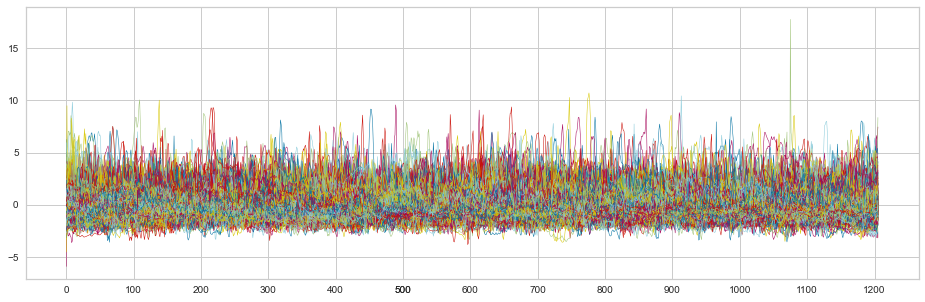

In [109]:
plt.figure(figsize=(16,5))
plt.xticks([0.0,100.0,200.0,300.0,400.0,500.0,500.0,600.0,700.0,800.0,900.0,1000.0,1100.0,1200.0])
plt.plot(ts, linewidth=0.5)
plt.show()

In [103]:
ts1=ts.iloc[[15]].index

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Lag plot')

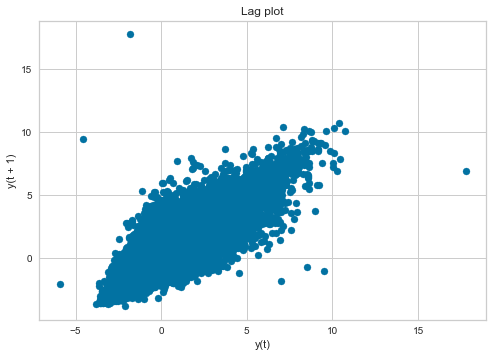

In [106]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(ts)
plt.title('Lag plot')

Text(0.5, 1.0, 'Autocorrelation plot')

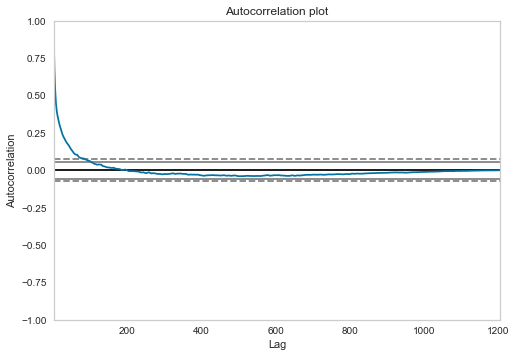

In [93]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ts)
plt.title('Autocorrelation plot')

## Shape-based Clustering

# KMeans

In [17]:
#libreries for clustering
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from tslearn.clustering import TimeSeriesKMeans

### K-MEANS VALIDATION

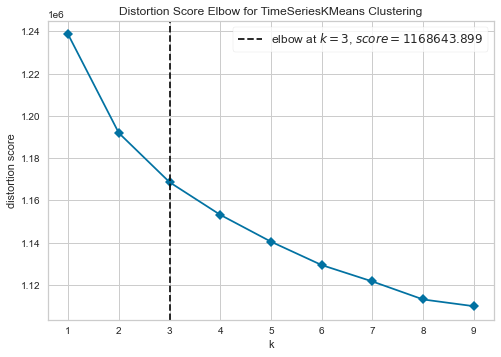

<AxesSubplot:title={'center':'Distortion Score Elbow for TimeSeriesKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
# Instantiate the clustering model and visualizer
model = TimeSeriesKMeans()
visualizer = KElbowVisualizer(model, k=(1,10),timings=False) #timengs = time to compute

visualizer.fit(ts)       # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


In [27]:
#calculate silhouette for different values of K
k_to_test = range(2,11,1) # [2,3,4, ..., 24]
silhouette_scores = {}

for k in k_to_test:
    model_kmeans_k = TimeSeriesKMeans( n_clusters = k )
    model_kmeans_k.fit(ts)
    labels_k = model_kmeans_k.labels_
    score_k = metrics.silhouette_score(ts, labels_k)
    silhouette_scores[k] = score_k
    print("Tested kMeans with k = %d\tSS: %5.4f" % (k, score_k))
    
print("Done!")

Tested kMeans with k = 2	SS: 0.0359
Tested kMeans with k = 3	SS: 0.0272
Tested kMeans with k = 4	SS: 0.0232
Tested kMeans with k = 5	SS: 0.0210
Tested kMeans with k = 6	SS: 0.0194
Tested kMeans with k = 7	SS: 0.0182
Tested kMeans with k = 8	SS: 0.0156
Tested kMeans with k = 9	SS: 0.0183
Tested kMeans with k = 10	SS: 0.0164
Done!


In [28]:
#convert dict values to a list 
sil_v = []
for i in silhouette_scores.values():
    sil_v.append(i)

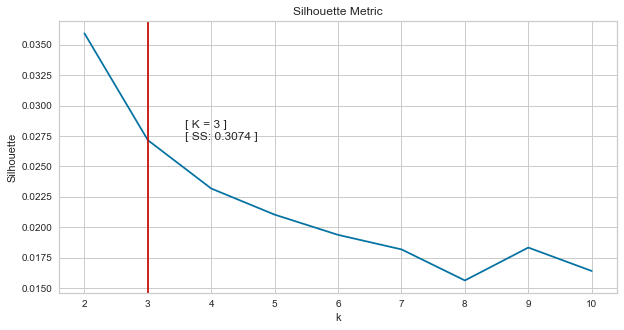

In [29]:
#Silhouette metric graph
plt.figure(figsize = (10,5))
plt.plot(sil_v)
plt.xticks(range(0,9,1), silhouette_scores.keys())
plt.title("Silhouette Metric")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.axvline(1, color = "r")
plt.figtext(0.3,0.55,'[ K = 3 ]\n[ SS: 0.3074 ] ')
plt.show()


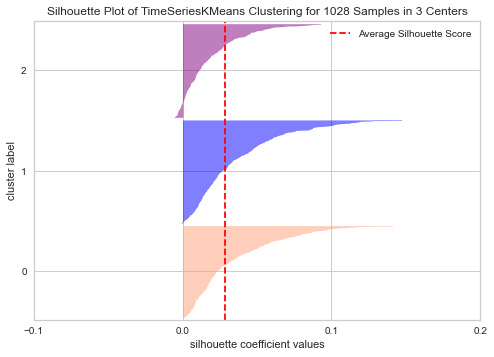

<AxesSubplot:title={'center':'Silhouette Plot of TimeSeriesKMeans Clustering for 1028 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [30]:
#visualize silhouette for K=3
from yellowbrick.cluster import SilhouetteVisualizer

model = TimeSeriesKMeans(3)
visualizer = SilhouetteVisualizer(model, colors = ['lightsalmon','blue','purple'])

visualizer.fit(ts)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [209]:
km= TimeSeriesKMeans(n_clusters=3,metric='euclidean',n_init=10, max_iter=200, random_state=0)
km.fit(ts)

TimeSeriesKMeans(max_iter=200, n_init=10, random_state=0)

In [210]:
km.cluster_centers_.shape

(3, 1206, 1)

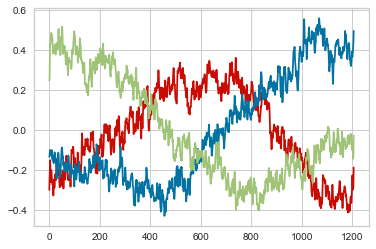

In [211]:
plt.plot(np.squeeze(km.cluster_centers_[0], ).T, color='r')
plt.plot(np.squeeze(km.cluster_centers_[1],).T, color='b')
plt.plot(np.squeeze(km.cluster_centers_[2], ).T, color='g')
plt.show()

In [212]:
ts_df_eu=ts_df.copy()
ts_df_eu['Cluster_eu']=km.labels_

In [213]:
clas_0=ts_df_eu[ts_df_eu['genre_top']=='Classical'][ts_df_eu['Cluster_eu']==0].index
clas_1=ts_df_eu[ts_df_eu['genre_top']=='Classical'][ts_df_eu['Cluster_eu']==1].index
clas_2=ts_df_eu[ts_df_eu['genre_top']=='Classical'][ts_df_eu['Cluster_eu']==2].index
old_0=ts_df_eu[ts_df_eu['genre_top']=='Old-Time / Historic'][ts_df_eu['Cluster_eu']==0].index
old_1=ts_df_eu[ts_df_eu['genre_top']=='Old-Time / Historic'][ts_df_eu['Cluster_eu']==1].index
old_2=ts_df_eu[ts_df_eu['genre_top']=='Old-Time / Historic'][ts_df_eu['Cluster_eu']==2].index

In [214]:
print('Cluster 0: Classical:{}, Old-Time/Historic:{}, Total of:{}'.format(len(clas_0),len(old_0),len(clas_0)+len(old_0)))
print('Cluster 1: Classical:{}, Old-Time/Historic:{}, Total of {}'.format(len(clas_1),len(old_1),len(clas_1)+len(old_1)))
print('Cluster 2: Classical:{}, Old-Time/Historic:{}, Total of {}'.format(len(clas_2),len(old_2),len(clas_2)+len(old_2)))

Cluster 0: Classical:170, Old-Time/Historic:178, Total of:348
Cluster 1: Classical:207, Old-Time/Historic:134, Total of 341
Cluster 2: Classical:149, Old-Time/Historic:190, Total of 339


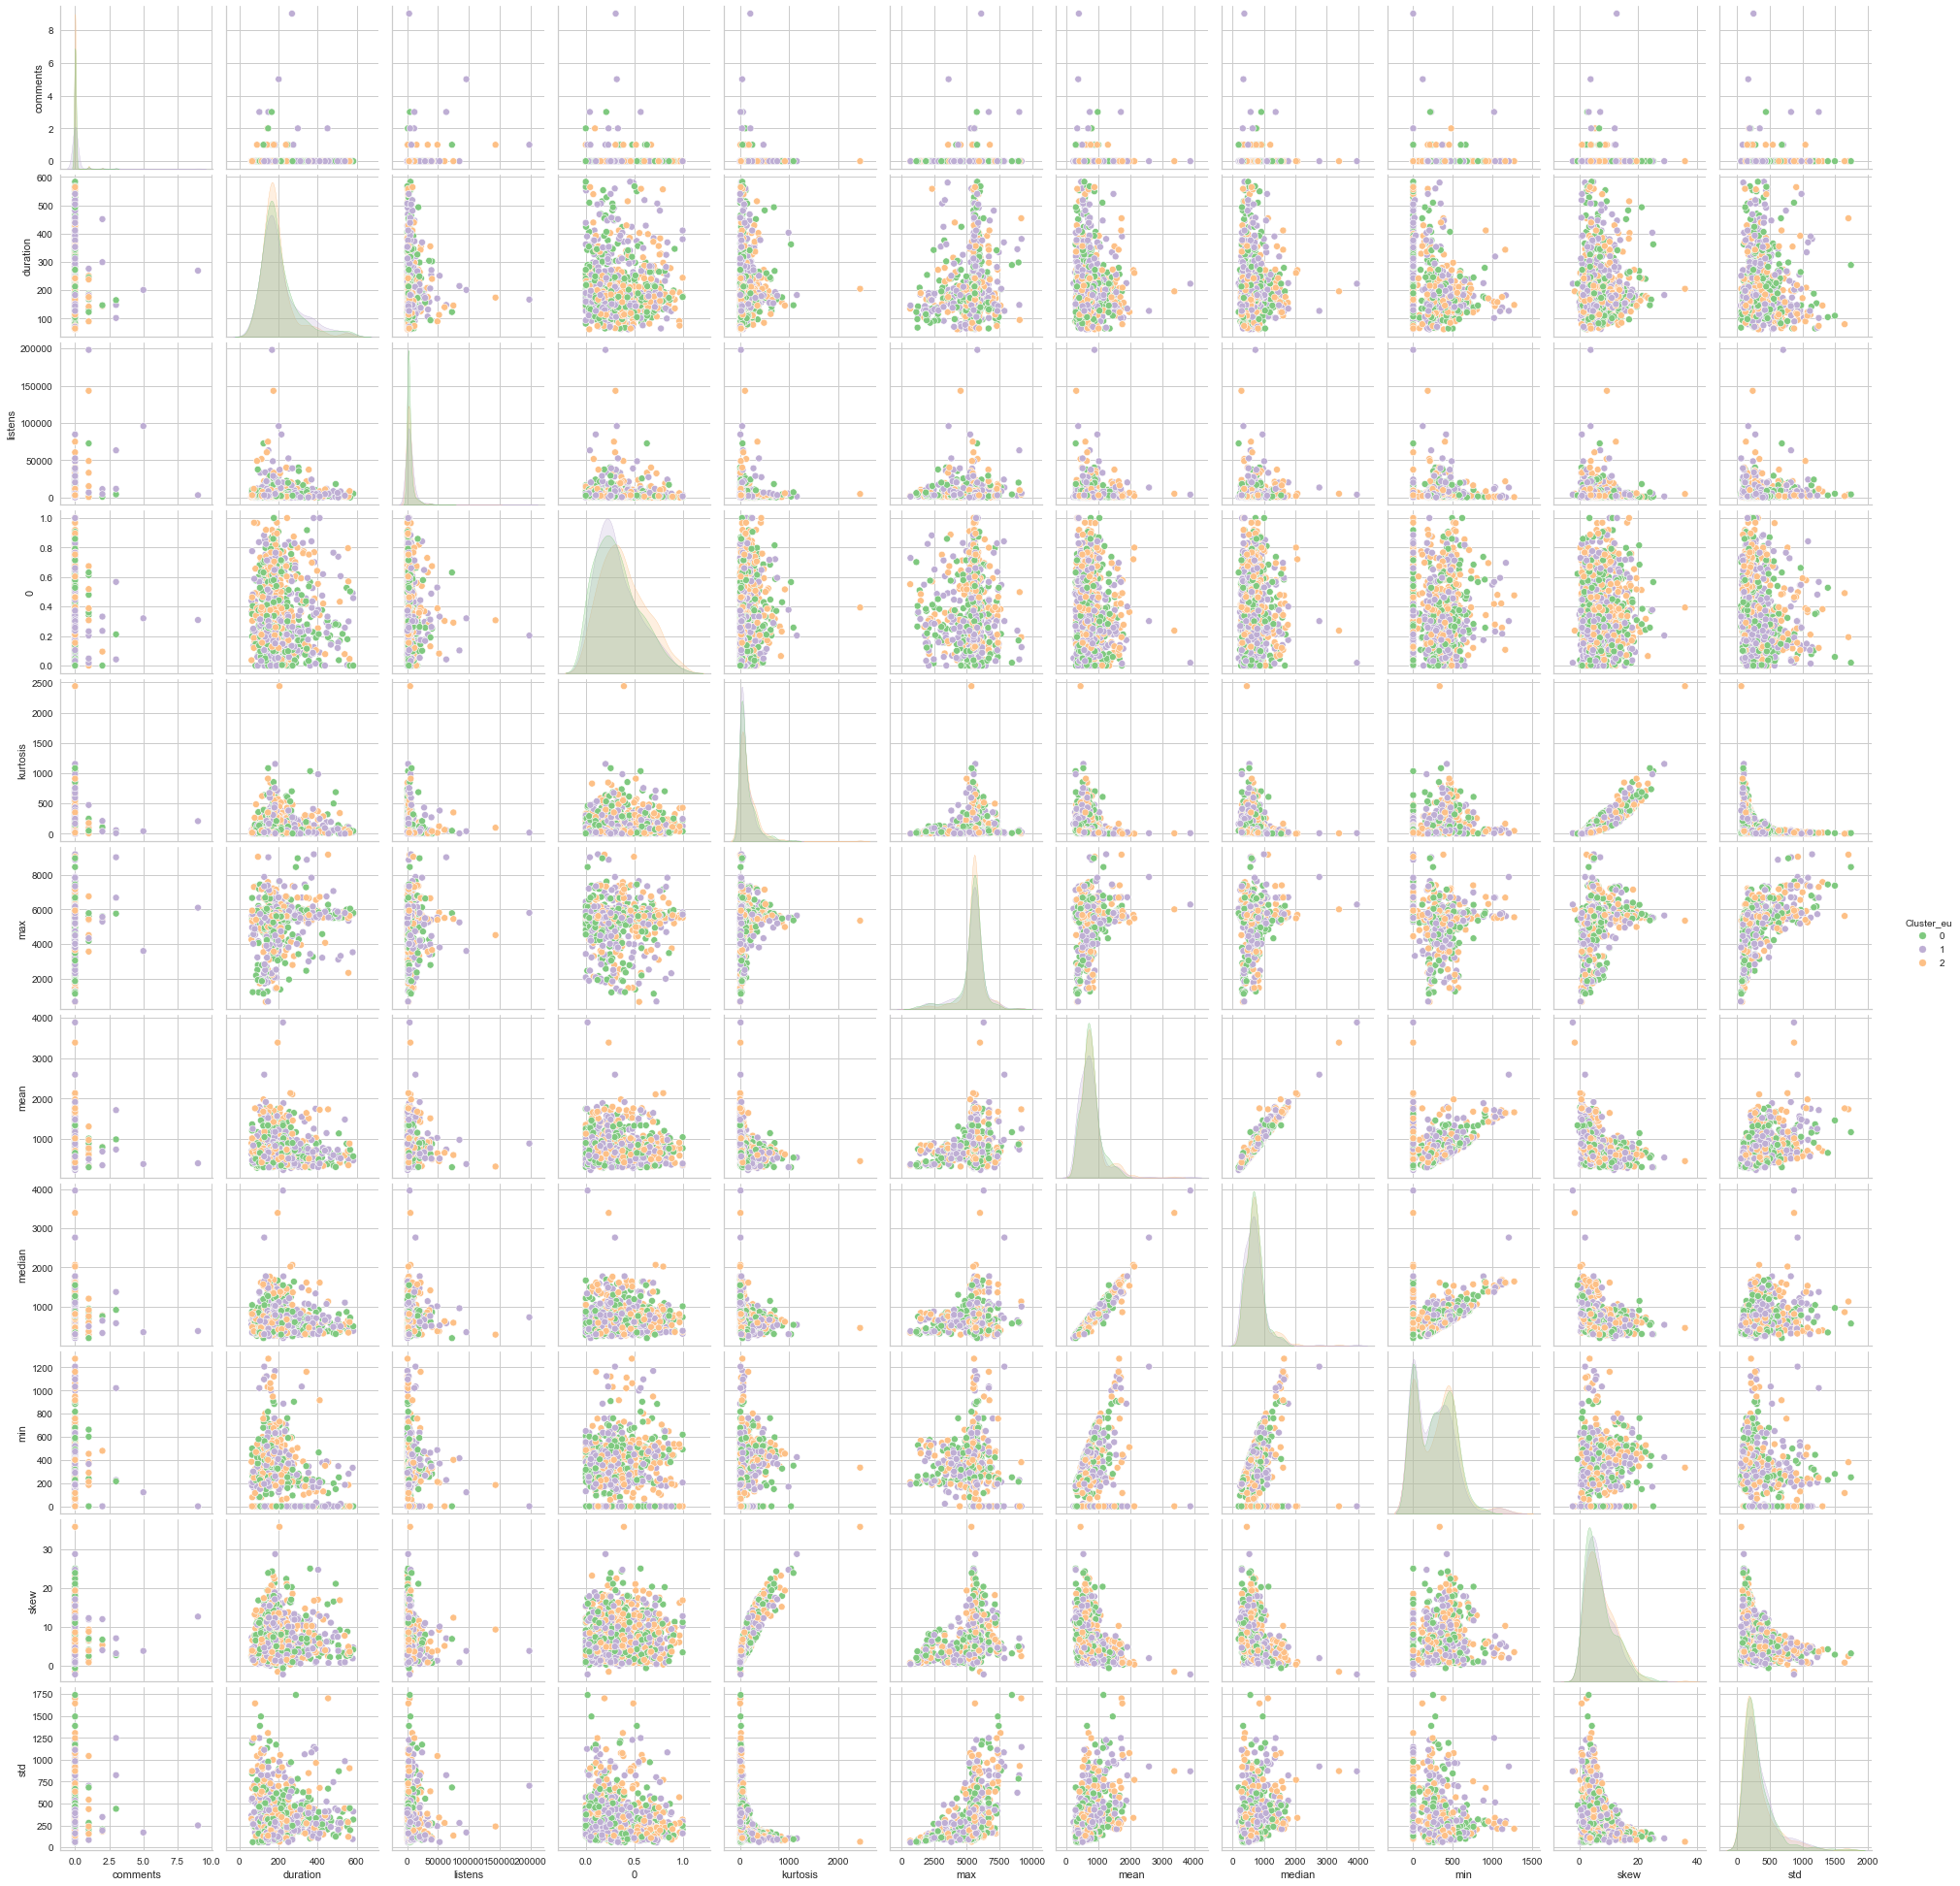

In [215]:
sns.pairplot(ts_df_eu, palette='Accent', hue='Cluster_eu')

## KMeans: DTW

In [ ]:
km_dtw=TimeSeriesKMeans(n_clusters=3, metric='dtw', n_init=10, max_iter=200, max_iter_barycenter=100, random_state=0)
km_dtw.fit(ts)

In [ ]:
plt.plot(np.squeeze(km_dtw.cluster_centers_[0], ).T, color='r')
plt.plot(np.squeeze(km_dtw.cluster_centers_[1],).T, color='b')
plt.plot(np.squeeze(km_dtw.cluster_centers_[2], ).T, color='g')
plt.show()
plt.figure(figsize=(6,30))
plt.show()

In [ ]:
#Observing the size of each cluster
np.unique(km_dtw.labels_, return_counts=True)

In [ ]:
ts_df_dtw=ts_df_dtws_df.copy()
ts_df_dtw["Cluster_dtw"] = km_dtw.labels_

In [ ]:
clas_0_dtw=ts_df_dtw[ts_df_dtw['genre_top']=='Classical'][ts_df_dtw['Cluster_dtw']==0].index
clas_1_dtw=ts_df_dtw[ts_df_dtw['genre_top']=='Classical'][ts_df_dtw['Cluster_dtw']==1].index
clas_2_dtw=ts_df_dtw[ts_df_dtw['genre_top']=='Classical'][ts_df_dtw['Cluster_dtw']==2].index
old_0_dtw=ts_df_dtw[ts_df_dtw['genre_top']=='Old-Time / Historic'][ts_df_dtw['Cluster_dtw']==0].index
old_1_dtw=ts_df_dtw[ts_df_dtw['genre_top']=='Old-Time / Historic'][ts_df_dtw['Cluster_dtw']==1].index
old_2_dtw=ts_df_dte[ts_df_dtw['genre_top']=='Old-Time / Historic'][ts_df_dtw['Cluster_dtw']==2].index

In [ ]:
print('Cluster 0: Classical:{}, Old-Time/Historic:{}, Total of:{}'.format(len(clas_0_dtw),len(old_0_dtw),len(clas_0_dtw)+len(old_0_dtw)))
print('Cluster 1: Classical:{}, Old-Time/Historic:{}, Total of {}'.format(len(clas_1_dtw),len(old_1_dtw),len(clas_1_dtw)+len(old_1_dtw)))
print('Cluster 2: Classical:{}, Old-Time/Historic:{}, Total of {}'.format(len(clas_2_dtw),len(old_2_dtw),len(clas_2_dtw)+len(old_2_dtw)))

In [ ]:
sns.pairplot(ts_df_eu, palette='Accent', hue='Cluster_dtw')
plt.show()

# Approximated Clustering

## PiecewiseAggregateApproximation

In [30]:
import ruptures as rpt
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation

In [31]:
n_paa_segments = 60
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(ts)

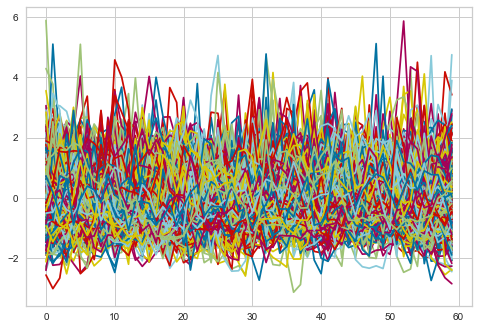

In [32]:
plt.plot(X_paa.T.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.show()

## PAA: Euclidean

In [33]:
km_paa_eu = TimeSeriesKMeans(n_clusters=3, metric="euclidean",n_init=10, max_iter=200, random_state=0)
km_paa_eu.fit(X_paa)

TimeSeriesKMeans(max_iter=200, n_init=10, random_state=0)

In [34]:
km_paa_eu.cluster_centers_.shape

(3, 60, 1)

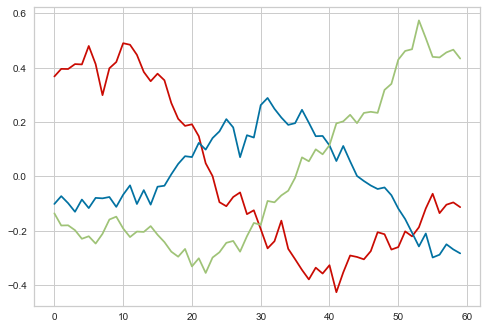

In [35]:
plt.plot(np.squeeze(km_paa_eu.cluster_centers_[0]).T, color='r')
plt.plot(np.squeeze(km_paa_eu.cluster_centers_[1]).T, color='b')
plt.plot(np.squeeze(km_paa_eu.cluster_centers_[2]).T, color='g')
plt.show()

In [36]:
#Observing the size of each cluster
np.unique(km_paa_eu.labels_, return_counts=True)

(array([0, 1, 2], dtype=int64), array([269, 438, 321], dtype=int64))

In [37]:
ts_df1=ts_df.copy()
ts_df1["Cluster__paa_eu"] = km_paa_eu.labels_

In [38]:
clas_0_paa_eu=ts_df1[ts_df1['genre_top']=='Classical'][ts_df1["Cluster__paa_eu"]==0].index
clas_1_paa_eu=ts_df1[ts_df1['genre_top']=='Classical'][ts_df1["Cluster__paa_eu"]==1].index
clas_2_paa_eu=ts_df1[ts_df1['genre_top']=='Classical'][ts_df1["Cluster__paa_eu"]==2].index
old_0_paa_eu=ts_df1[ts_df1['genre_top']=='Old-Time / Historic'][ts_df1["Cluster__paa_eu"]==0].index
old_1_paa_eu=ts_df1[ts_df1['genre_top']=='Old-Time / Historic'][ts_df1["Cluster__paa_eu"]==1].index
old_2_paa_eu=ts_df1[ts_df1['genre_top']=='Old-Time / Historic'][ts_df1["Cluster__paa_eu"]==2].index

In [39]:
print('Cluster 0: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_0_paa_eu),len(old_0_paa_eu),len(old_0_paa_eu)+len(clas_0_paa_eu)))
print('Cluster 1: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_1_paa_eu),len(old_1_paa_eu),len(old_1_paa_eu)+len(clas_1_paa_eu)))
print('Cluster 2: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_2_paa_eu),len(old_2_paa_eu),len(old_2_paa_eu)+len(clas_2_paa_eu)))

Cluster 0: Classical:132,Old-Time/Historic:137, Total of:269
Cluster 1: Classical:197,Old-Time/Historic:241, Total of:438
Cluster 2: Classical:197,Old-Time/Historic:124, Total of:321


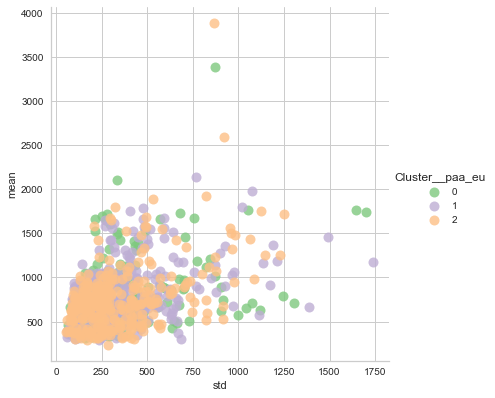

In [40]:
sns.lmplot(data=ts_df1,
                  y='mean',
                  x='std', hue='Cluster__paa_eu',markers=['o','o','o'],
                  size=5.5,
                  fit_reg =False,
                  palette='Accent',
                  scatter_kws={'s':100})
plt.show()

## PAA: DTW

In [41]:
km_paa_dtw = TimeSeriesKMeans(n_clusters=3,  metric='dtw', n_init=10, max_iter=200, max_iter_barycenter=100, random_state=0)
km_paa_dtw.fit(X_paa)

TimeSeriesKMeans(max_iter=200, metric='dtw', n_init=10, random_state=0)

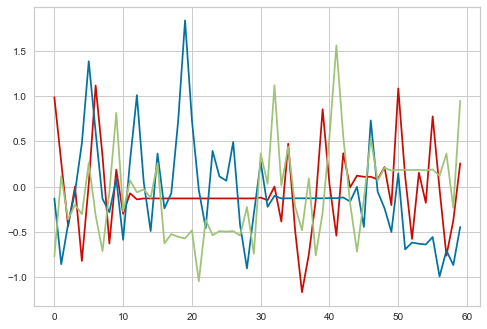

In [42]:
plt.plot(np.squeeze(km_paa_dtw.cluster_centers_[0]).T, color='r')
plt.plot(np.squeeze(km_paa_dtw.cluster_centers_[1]).T, color='b')
plt.plot(np.squeeze(km_paa_dtw.cluster_centers_[2]).T, color='g')
plt.show()

In [43]:
#Observing the size of each cluster
np.unique(km_paa_dtw.labels_, return_counts=True)

(array([0, 1, 2], dtype=int64), array([383, 337, 308], dtype=int64))

In [44]:
ts_df2=ts_df.copy()
ts_df2["Cluster__paa_dtw"] = km_paa_dtw.labels_

In [45]:
clas_0_paa_dtw=ts_df2[ts_df2['genre_top']=='Classical'][ts_df2["Cluster__paa_dtw"]==0].index
clas_1_paa_dtw=ts_df2[ts_df2['genre_top']=='Classical'][ts_df2["Cluster__paa_dtw"]==1].index
clas_2_paa_dtw=ts_df2[ts_df2['genre_top']=='Classical'][ts_df2["Cluster__paa_dtw"]==2].index
old_0_paa_dtw=ts_df2[ts_df2['genre_top']=='Old-Time / Historic'][ts_df2["Cluster__paa_dtw"]==0].index
old_1_paa_dtw=ts_df2[ts_df2['genre_top']=='Old-Time / Historic'][ts_df2["Cluster__paa_dtw"]==1].index
old_2_paa_dtw=ts_df2[ts_df2['genre_top']=='Old-Time / Historic'][ts_df2["Cluster__paa_dtw"]==2].index

In [46]:
print('Cluster 0: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_0_paa_dtw),len(old_0_paa_dtw),len(old_0_paa_dtw)+len(clas_0_paa_dtw)))
print('Cluster 1: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_1_paa_dtw),len(old_1_paa_dtw),len(old_1_paa_dtw)+len(clas_1_paa_dtw)))
print('Cluster 2: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_2_paa_dtw),len(old_2_paa_dtw),len(old_2_paa_dtw)+len(clas_2_paa_dtw)))

Cluster 0: Classical:175,Old-Time/Historic:208, Total of:383
Cluster 1: Classical:180,Old-Time/Historic:157, Total of:337
Cluster 2: Classical:171,Old-Time/Historic:137, Total of:308


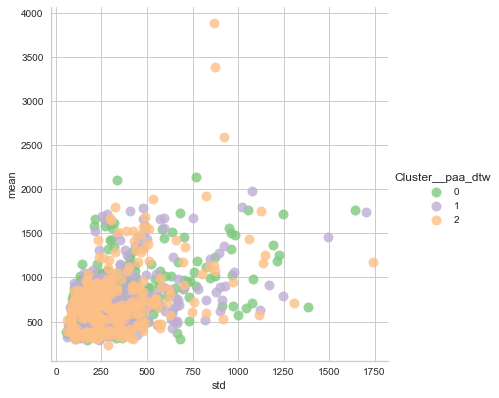

In [47]:
sns.lmplot(data=ts_df2,
                  y='mean',
                  x='std', hue='Cluster__paa_dtw',markers=['o','o','o'],
                  size=5.5,
                  fit_reg =False,
                  palette='Accent',
                  scatter_kws={'s':100})
plt.show()

## SAX: Euclidean

In [48]:
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
X_sax = sax.fit_transform(ts)

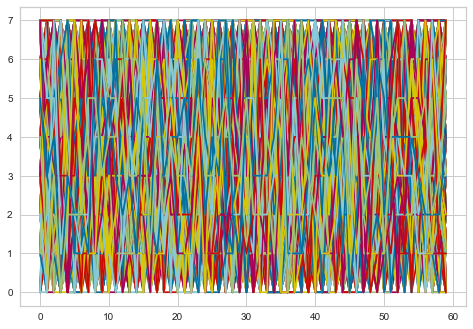

In [49]:
plt.plot(X_sax.reshape(X_sax.shape[1], X_sax.shape[0]))
plt.show()

In [50]:
km_sax = TimeSeriesKMeans(n_clusters=3, metric="euclidean",n_init=10, max_iter=200, random_state=0)
km_sax.fit(X_sax)

TimeSeriesKMeans(max_iter=200, n_init=10, random_state=0)

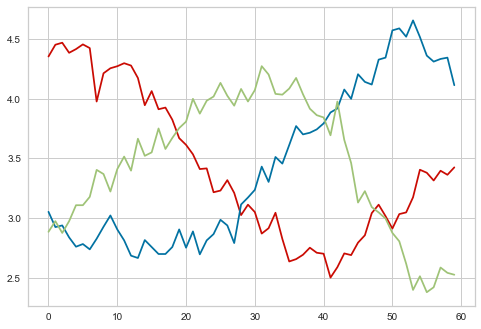

In [51]:
plt.plot(np.squeeze(km_sax.cluster_centers_[0]).T, color='r')
plt.plot(np.squeeze(km_sax.cluster_centers_[1]).T, color='b')
plt.plot(np.squeeze(km_sax.cluster_centers_[2]).T, color='g')
plt.show()

In [52]:
#Observing the size of each cluster
np.unique(km_sax.labels_, return_counts=True)

(array([0, 1, 2], dtype=int64), array([355, 359, 314], dtype=int64))

In [53]:
ts_df3=ts_df.copy()
ts_df3["Cluster__sax_eu"] = km_sax.labels_

In [54]:
clas_0_sax_eu=ts_df3[ts_df3['genre_top']=='Classical'][ts_df3["Cluster__sax_eu"]==0].index
clas_1_sax_eu=ts_df3[ts_df3['genre_top']=='Classical'][ts_df3["Cluster__sax_eu"]==1].index
clas_2_sax_eu=ts_df3[ts_df3['genre_top']=='Classical'][ts_df3["Cluster__sax_eu"]==2].index
old_0_sax_eu=ts_df3[ts_df3['genre_top']=='Old-Time / Historic'][ts_df3["Cluster__sax_eu"]==0].index
old_1_sax_eu=ts_df3[ts_df3['genre_top']=='Old-Time / Historic'][ts_df3["Cluster__sax_eu"]==1].index
old_2_sax_eu=ts_df3[ts_df3['genre_top']=='Old-Time / Historic'][ts_df3["Cluster__sax_eu"]==2].index

In [55]:
print('Cluster 0: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_0_sax_eu),len(old_0_sax_eu),len(old_0_sax_eu)+len(clas_0_sax_eu)))
print('Cluster 1: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_1_sax_eu),len(old_1_sax_eu),len(old_1_sax_eu)+len(clas_1_sax_eu)))
print('Cluster 2: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_2_sax_eu),len(old_2_sax_eu),len(old_2_sax_eu)+len(clas_2_sax_eu)))

Cluster 0: Classical:156,Old-Time/Historic:199, Total of:355
Cluster 1: Classical:210,Old-Time/Historic:149, Total of:359
Cluster 2: Classical:160,Old-Time/Historic:154, Total of:314


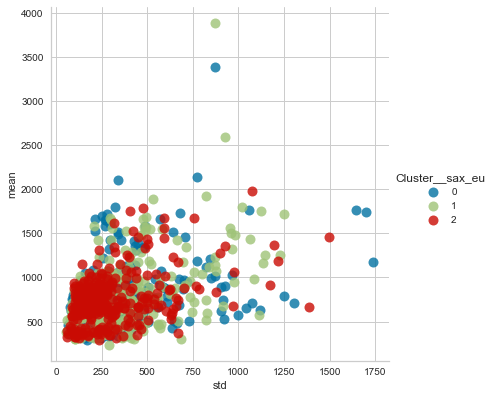

In [56]:
palette ={0: "C0", 1: "C1", 2: "C2"}
sns.lmplot(data=ts_df3,
                  y='mean',
                  x='std', hue='Cluster__sax_eu',markers=['o','o','o'],
                  size=5.5,
                  fit_reg =False,
                  palette=palette,
                  scatter_kws={'s':100})
plt.show()

## SAX: DTW

In [57]:
km_sax_dtw = TimeSeriesKMeans(n_clusters=3, metric='dtw', n_init=10, max_iter=200, max_iter_barycenter=100, random_state=0)
km_sax_dtw.fit(X_sax)

TimeSeriesKMeans(max_iter=200, metric='dtw', n_init=10, random_state=0)

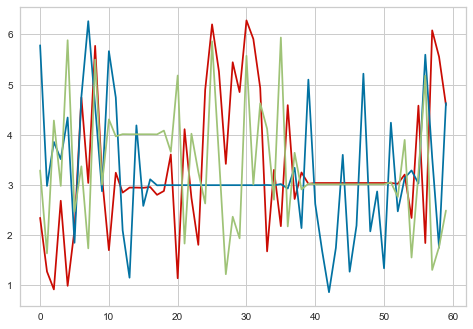

In [58]:
plt.plot(np.squeeze(km_sax_dtw.cluster_centers_[0]).T, color='r')
plt.plot(np.squeeze(km_sax_dtw.cluster_centers_[1]).T, color='b')
plt.plot(np.squeeze(km_sax_dtw.cluster_centers_[2]).T, color='g')
plt.show()

In [59]:
#Observing the size of each cluster
np.unique(km_sax_dtw.labels_, return_counts=True)

(array([0, 1, 2], dtype=int64), array([251, 320, 457], dtype=int64))

In [60]:
ts_df4=ts_df.copy()
ts_df4["Cluster__sax_dtw"] = km_sax_dtw.labels_

In [61]:
clas_0_sax_dtw=ts_df4[ts_df4['genre_top']=='Classical'][ts_df4["Cluster__sax_dtw"]==0].index
clas_1_sax_dtw=ts_df4[ts_df4['genre_top']=='Classical'][ts_df4["Cluster__sax_dtw"]==1].index
clas_2_sax_dtw=ts_df4[ts_df4['genre_top']=='Classical'][ts_df4["Cluster__sax_dtw"]==2].index
old_0_sax_dtw=ts_df4[ts_df4['genre_top']=='Old-Time / Historic'][ts_df4["Cluster__sax_dtw"]==0].index
old_1_sax_dtw=ts_df4[ts_df4['genre_top']=='Old-Time / Historic'][ts_df4["Cluster__sax_dtw"]==1].index
old_2_sax_dtw=ts_df4[ts_df4['genre_top']=='Old-Time / Historic'][ts_df4["Cluster__sax_dtw"]==2].index

In [62]:
print('Cluster 0: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_0_sax_dtw),len(old_0_sax_dtw),len(old_0_sax_dtw)+len(clas_0_sax_dtw)))
print('Cluster 1: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_1_sax_dtw),len(old_1_sax_dtw),len(old_1_sax_dtw)+len(clas_1_sax_dtw)))
print('Cluster 2: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_2_sax_dtw),len(old_2_sax_dtw),len(old_2_sax_dtw)+len(clas_2_sax_dtw)))

Cluster 0: Classical:160,Old-Time/Historic:91, Total of:251
Cluster 1: Classical:166,Old-Time/Historic:154, Total of:320
Cluster 2: Classical:200,Old-Time/Historic:257, Total of:457


[]

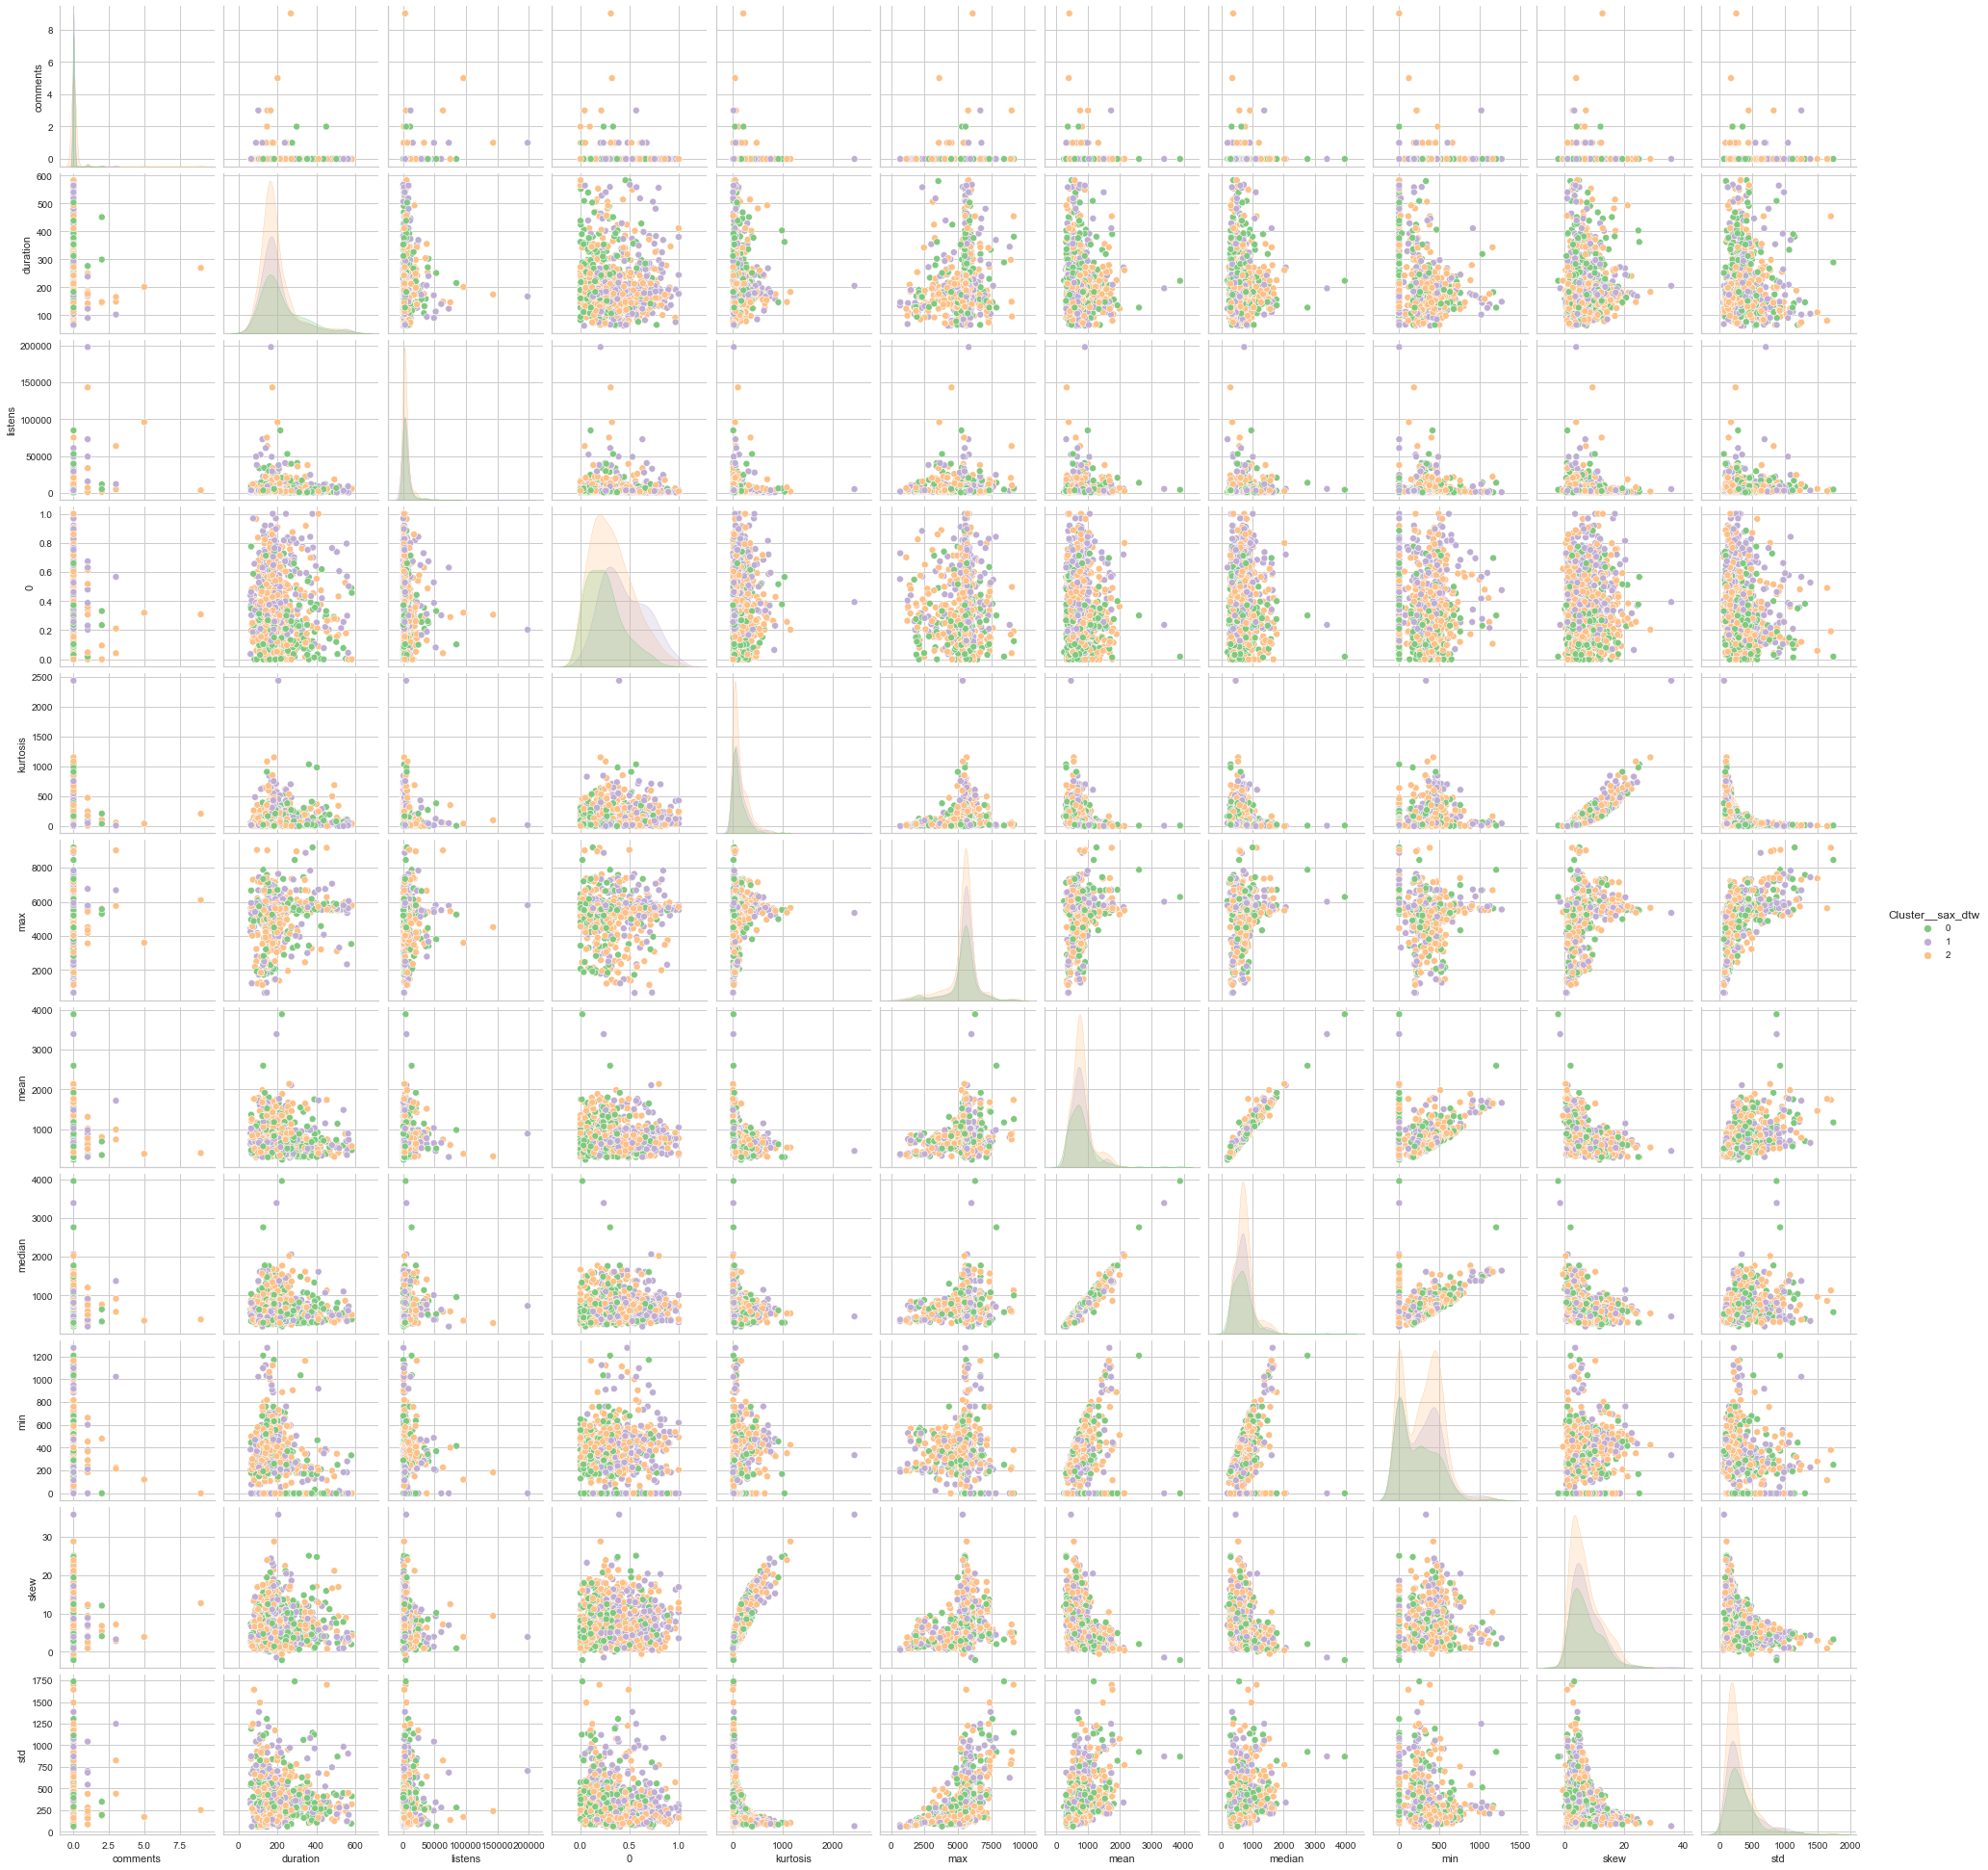

In [63]:
sns.pairplot(ts_df4, hue='Cluster__sax_dtw', palette='Accent')
plt.plot()

# Hierarchical: Euclidean

In [64]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from tslearn.metrics import dtw as dtw
from matplotlib import pyplot as plt

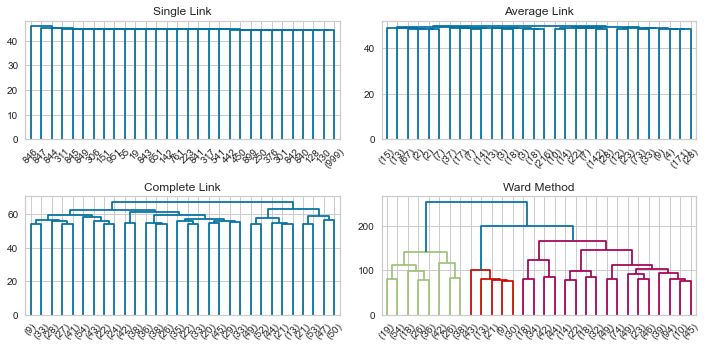

In [65]:
plt.figure( figsize=(10,5))

plt.subplot(2,2, 1)
data_dist = pdist(ts, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')
plt.title('Single Link')

plt.subplot(2, 2, 2)
data_dist = pdist(ts, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')
plt.title('Average Link')

plt.subplot(2,2, 3)
data_dist = pdist(ts, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')
plt.title('Complete Link')

plt.subplot(2, 2, 4)
data_dist = pdist(ts, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')
plt.title('Ward Method')

plt.tight_layout()
plt.show()

In [66]:
#ward link
data_dist = pdist(ts, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')
plt.title('Ward')

Text(0.5, 1.0, 'Ward')

In [67]:
ts_df.iloc[9]

comments                       0
duration                     258
genre_top    Old-Time / Historic
listens                     1019
0                            0.0
kurtosis               13.331332
max                  5502.308106
mean                 1154.982056
median                1056.62793
min                          0.0
skew                    2.676594
std                    351.40979
Name: 5018, dtype: object

In [68]:
ward = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
ward.fit_predict(ts)

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [69]:
ts_df_hier=ts_df.copy()
ts_df_hier['Cluster']=ward.labels_

In [70]:
clas_0_h=ts_df_hier[ts_df_hier['genre_top']=='Classical'][ts_df_hier["Cluster"]==0].index
clas_1_h=ts_df_hier[ts_df_hier['genre_top']=='Classical'][ts_df_hier["Cluster"]==1].index
clas_2_h=ts_df_hier[ts_df_hier['genre_top']=='Classical'][ts_df_hier["Cluster"]==2].index
old_0_h=ts_df_hier[ts_df_hier['genre_top']=='Old-Time / Historic'][ts_df_hier["Cluster"]==0].index
old_1_h=ts_df_hier[ts_df_hier['genre_top']=='Old-Time / Historic'][ts_df_hier["Cluster"]==1].index
old_2_h=ts_df_hier[ts_df_hier['genre_top']=='Old-Time / Historic'][ts_df_hier["Cluster"]==2].index

In [71]:
print('Cluster 0: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_0_h),len(old_0_h),len(old_0_h)+len(clas_0_h)))
print('Cluster 1: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_1_h),len(old_1_h),len(old_1_h)+len(clas_1_h)))
print('Cluster 2: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_2_h),len(old_2_h),len(old_2_h)+len(clas_2_h)))

Cluster 0: Classical:285,Old-Time/Historic:368, Total of:653
Cluster 1: Classical:167,Old-Time/Historic:92, Total of:259
Cluster 2: Classical:74,Old-Time/Historic:42, Total of:116


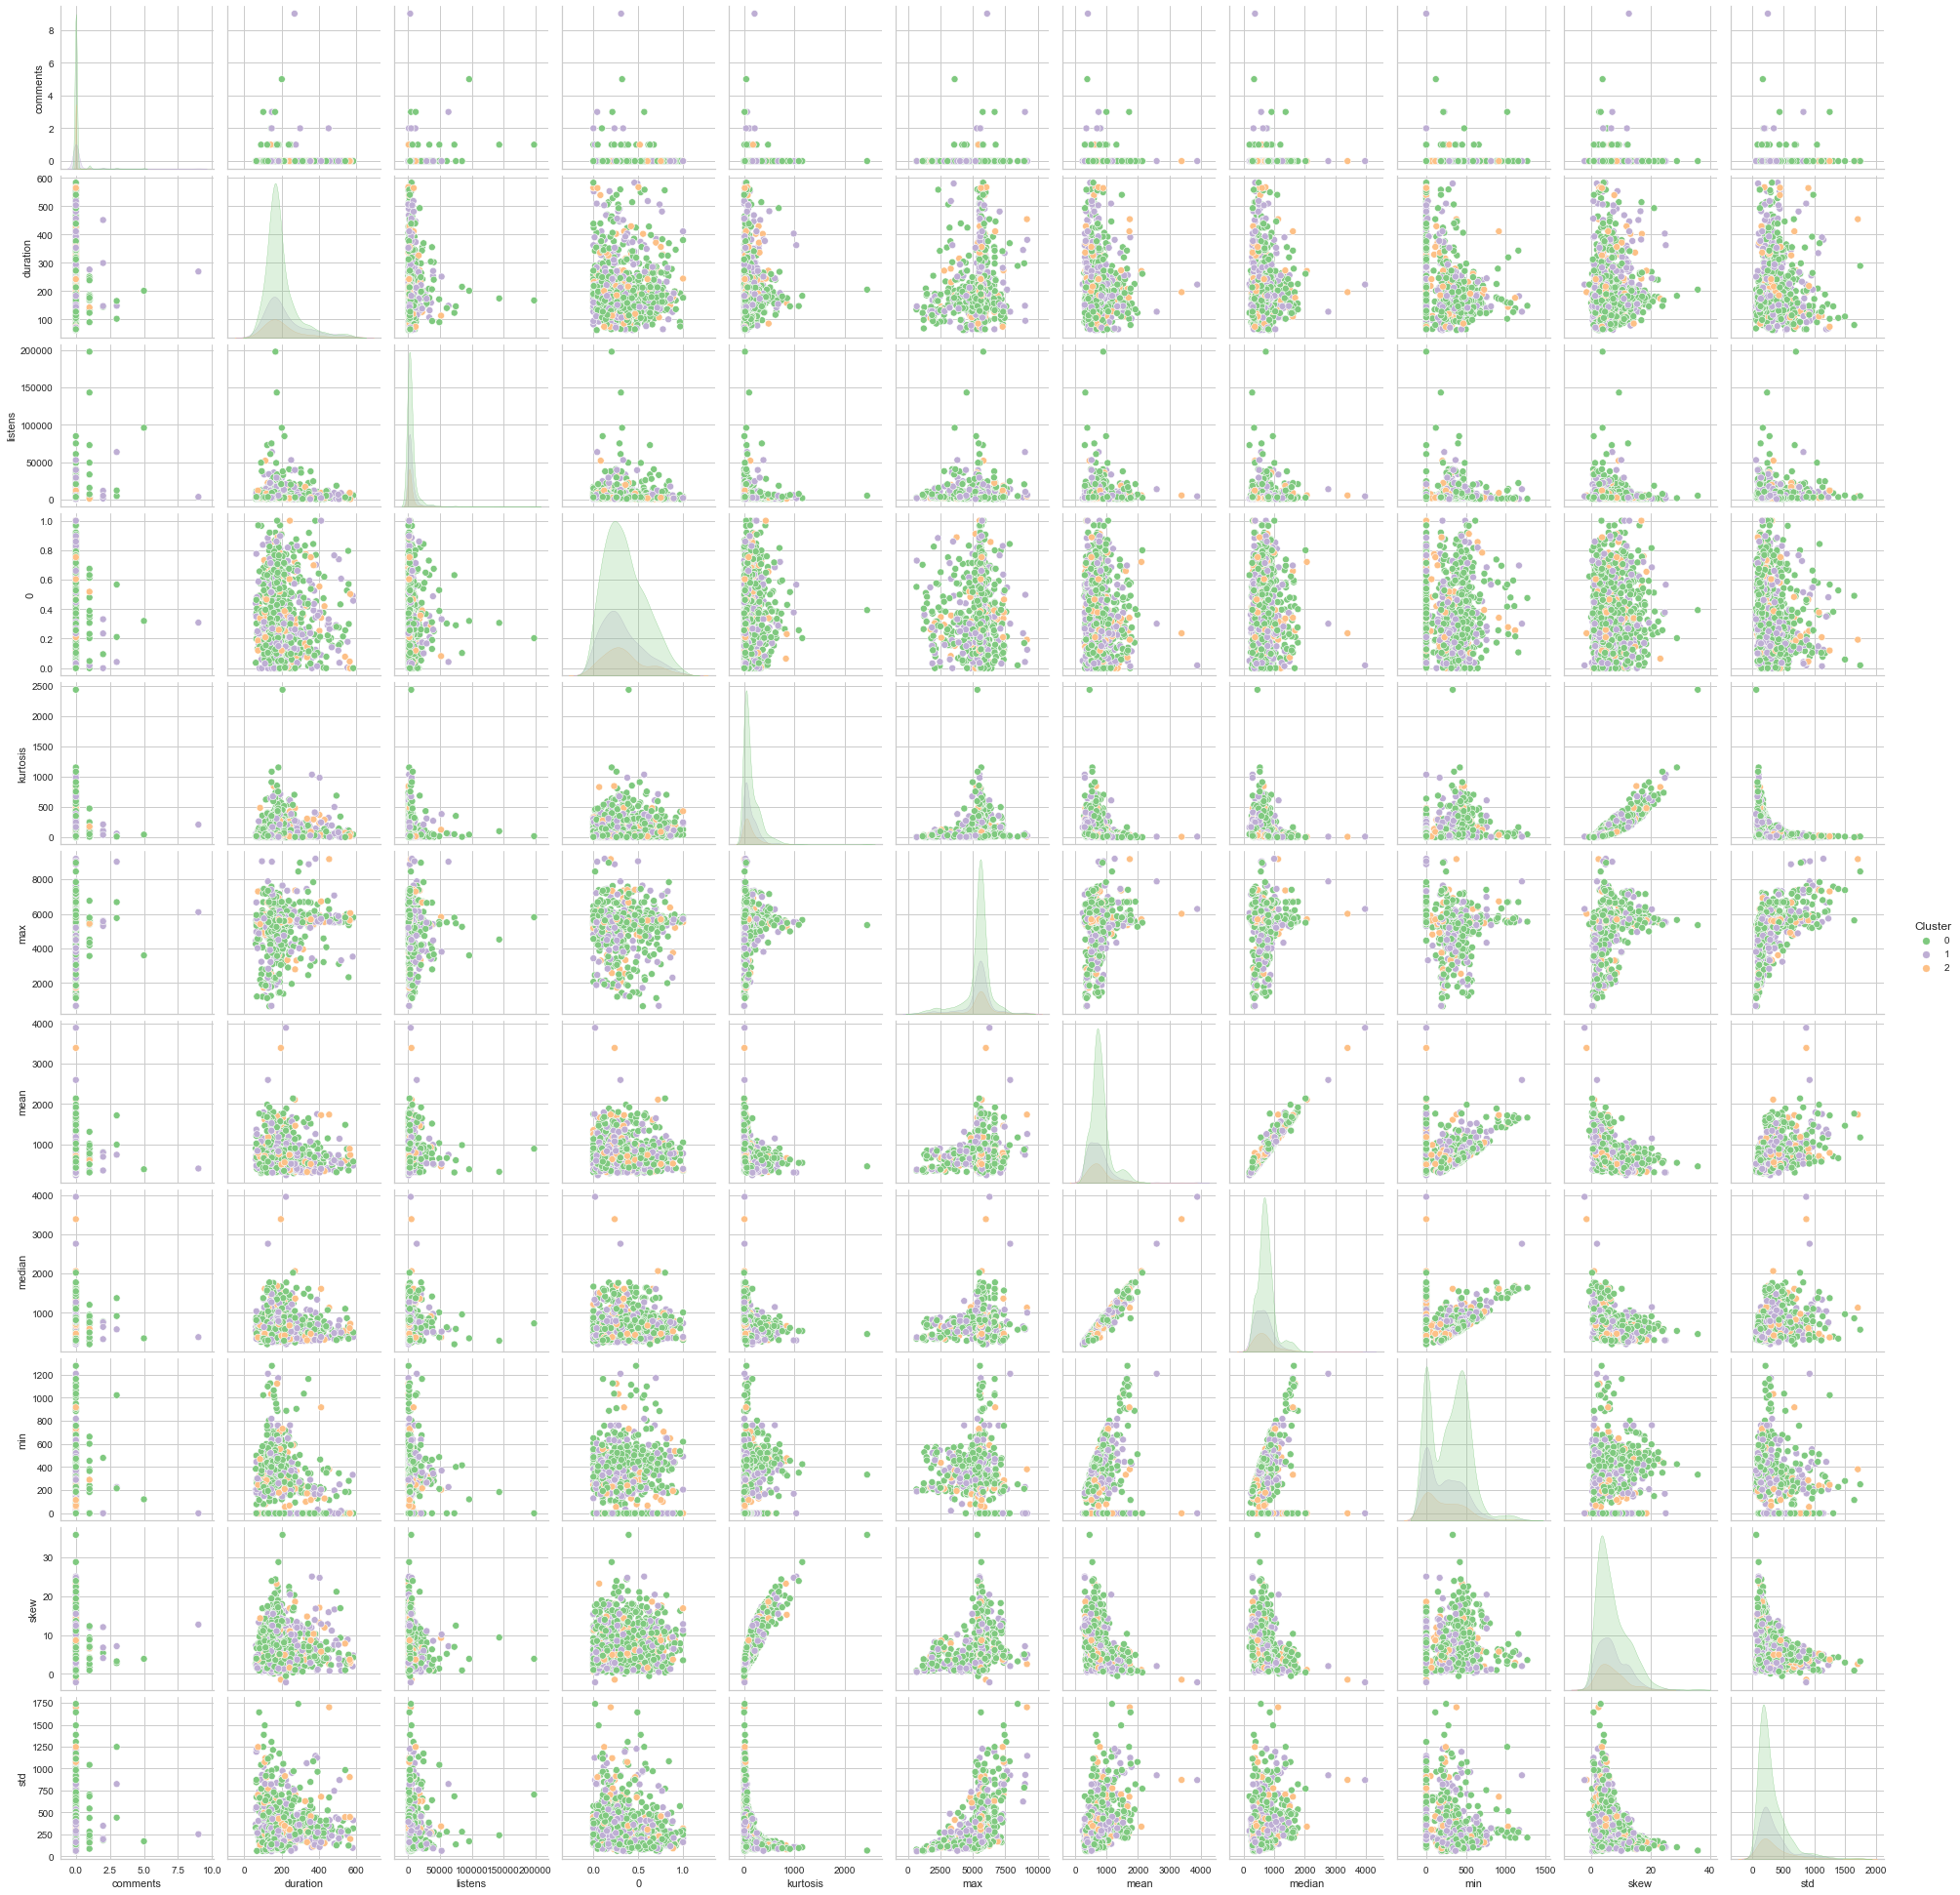

In [72]:
sns.pairplot(ts_df_hier, hue='Cluster', palette='Accent')
plt.show()

In [73]:
#wards method _ silhouette scores
k_to_test = range(2,10,1) # [2,3,4, ..., 24]
silhouette_scores_w = {}

for k in k_to_test:
    ward_linkage = AgglomerativeClustering(n_clusters=k, linkage='ward', affinity='euclidean')
    
    ward_linkage.fit(ts)
    labels_kw = ward_linkage.labels_
    score_kw = silhouette_score(ts, ward_linkage.labels_)
    silhouette_scores_w[k] = score_kw
    
    print ('silhouette for k= {}: {}'.format(k,score_kw))
print('Done')

silhouette for k= 2: 0.024224235787977718
silhouette for k= 3: 0.010095688077622749
silhouette for k= 4: 0.010596940573566591
silhouette for k= 5: 0.010788236455009197
silhouette for k= 6: 0.005479764742136714
silhouette for k= 7: 0.001931266212164225
silhouette for k= 8: -0.001973524204321472
silhouette for k= 9: -0.0017534452037365345
Done


In [74]:
#convert dict values to a list 
sil_v = []
for i in silhouette_scores_w.values():
    sil_v.append(i)

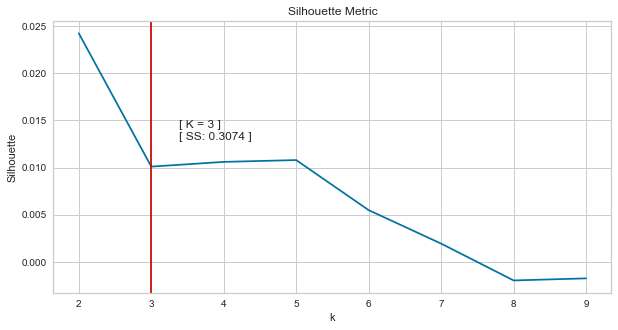

In [75]:
#Silhouette metric graph
plt.figure(figsize = (10,5))
plt.plot(sil_v)
plt.xticks(range(0,8,1), silhouette_scores_w.keys())
plt.title("Silhouette Metric")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.axvline(1, color = "r")
plt.figtext(0.3,0.55,'[ K = 3 ]\n[ SS: 0.3074 ] ')
plt.show()


## Hierarchical: DTW


In [76]:
import pandas as pd
import scipy.cluster.hierarchy as hac

In [77]:
dist=sklearn.metrics.pairwise.pairwise_distances(ts)

In [78]:
dtw_hier2 = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='precomputed')
dtw_hier2.fit_predict(dist)
dist.shape

(1028, 1028)

In [79]:
dtw_hier2 = AgglomerativeClustering(n_clusters=3, linkage='completle', affinity='precomputed')
dtw_hier2.fit_predict(dist)
dist.shape

ValueError: Unknown linkage type completle. Valid options are dict_keys(['ward', 'complete', 'average', 'single'])

In [ ]:
dtw_hier2 = AgglomerativeClustering(n_clusters=3, linkage='single', affinity='precomputed')
dtw_hier2.fit_predict(dist)
dist.shape

In [ ]:
np.unique(dtw_hier2.labels_,)

In [ ]:
ts_df_hier2=ts_df.copy()
ts_df_hier2['Cluster']=dtw_hier2.labels_

In [ ]:
clas_0_h2=ts_df_hier2[ts_df_hier2['genre_top']=='Classical'][ts_df_hier2["Cluster"]==0].index
clas_1_h2=ts_df_hier2[ts_df_hier2['genre_top']=='Classical'][ts_df_hier2["Cluster"]==1].index
clas_2_h2=ts_df_hier2[ts_df_hier2['genre_top']=='Classical'][ts_df_hier2["Cluster"]==2].index
old_0_h2=ts_df_hier2[ts_df_hier2['genre_top']=='Old-Time / Historic'][ts_df_hier2["Cluster"]==0].index
old_1_h2=ts_df_hier2[ts_df_hier2['genre_top']=='Old-Time / Historic'][ts_df_hier2["Cluster"]==1].index
old_2_h2=ts_df_hier2[ts_df_hier2['genre_top']=='Old-Time / Historic'][ts_df_hier2["Cluster"]==2].index

In [ ]:
print('Cluster 0: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_0_h2),len(old_0_h2),len(old_0_h2)+len(clas_0_h2)))
print('Cluster 1: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_1_h2),len(old_1_h2),len(old_1_h2)+len(clas_1_h2)))
print('Cluster 2: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_2_h2),len(old_2_h2),len(old_2_h2)+len(clas_2_h2)))

In [ ]:
sns.pairplot(ts_df_hier2, hue='Cluster', palette='Accent')
plt.show()